頂点 A の次数は 3 です
頂点 B の次数は 5 です
頂点 C の次数は 3 です
頂点 D の次数は 3 です
グラフにはエーラー回路がありません


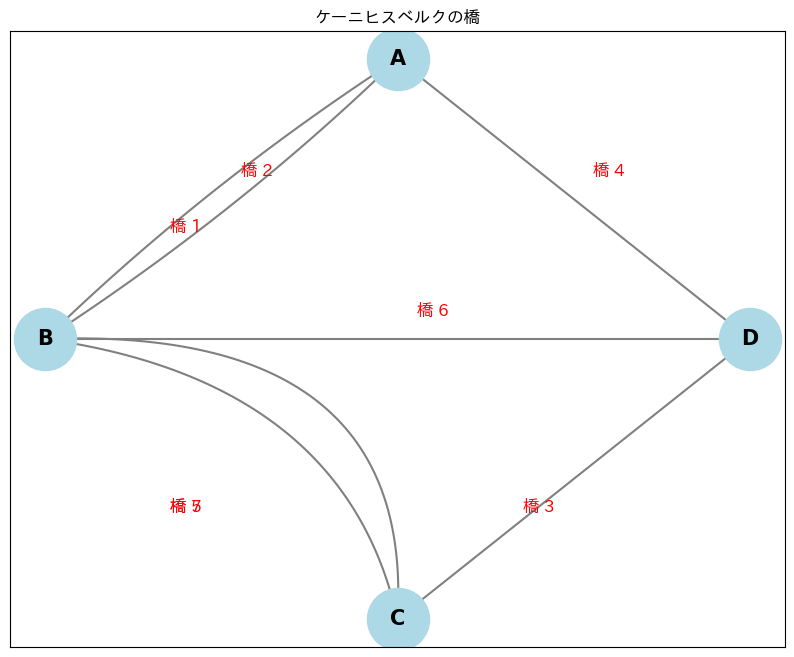

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

def bezier_curve(P0, P1, P2, t):
    return np.outer((1-t)**2, P0) + np.outer(2*(1-t)*t, P1) + np.outer(t**2, P2)

def draw_multiedge_curves(G, pos, ax):
    for (u, v, key) in G.edges(keys=True):
        num_edges = len(G[u][v])
        if num_edges > 1:
            angle = (key - (num_edges - 1) / 2) * 0.1
            P0 = np.array(pos[u])
            P2 = np.array(pos[v])
            P1 = (P0 + P2) / 2 + np.array([-angle * (P2[1] - P0[1]), angle * (P2[0] - P0[0])])
            t = np.linspace(0, 1, 100)
            curve = bezier_curve(P0, P1, P2, t)
            ax.plot(curve[:, 0], curve[:, 1], 'gray')
        else:
            P0, P2 = np.array(pos[u]), np.array(pos[v])
            ax.plot([P0[0], P2[0]], [P0[1], P2[1]], 'gray')

# MultiGraphを作成
G = nx.MultiGraph()

# ケーニヒスベルクの橋の頂点（A, B, C, D）
nodes = ['A', 'B', 'C', 'D']
G.add_nodes_from(nodes)

# 橋の辺を追加（修正されたエッジ）
edges = [('A', 'B'), ('A', 'B'), ('C', 'D'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'C')]
for i, edge in enumerate(edges):
    G.add_edge(edge[0], edge[1], key=i, label=f'橋 {i+1}')

# ノードの位置を手動で決定
pos = {
    'A': [0.5, 1.0],
    'B': [0, 0.5],
    'C': [0.5, 0],
    'D': [1, 0.5]
}

# グラフを描画
fig, ax = plt.subplots(figsize=(10, 8))

# 重複エッジをオフセットして描画
draw_multiedge_curves(G, pos, ax)

# ノードを描画
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', font_weight='bold', ax=ax)

# エッジラベルを手動で追加
edge_labels = nx.get_edge_attributes(G, 'label')
for (u, v, k), label in edge_labels.items():
    x = (pos[u][0] + pos[v][0]) / 2
    y = (pos[u][1] + pos[v][1]) / 2
    # ラベル位置を少しずらす
    offset = 0.05 * ((k % 2) * 2 - 1)
    plt.text(x + offset, y + offset, label, fontsize=12, color='red', horizontalalignment='center', verticalalignment='center')

# 各頂点の次数を表示
degrees = dict(G.degree())
for node, degree in degrees.items():
    print(f"頂点 {node} の次数は {degree} です")

# エーラー回路の存在をチェック
if nx.is_eulerian(G):
    print("グラフには一筆書きの解があります")
else:
    print("グラフには一筆書きの解がありません")

plt.title("ケーニヒスベルクの橋")
plt.show()
